# CMU Book Summary Dataset

## Extracting the data

In [1]:
# Imports
import pandas as pd

In [2]:
df=pd.read_csv('../Datasets/ds_beforeduplication.csv')

In [3]:
df

,Unnamed: 0,Name,Genres,Summary
0,1,A Clockwork Orange,Science Fiction,"Alex, a teenager living in near-future Englan..."
1,6,A Wizard of Earthsea,Children's literature,"Ged is a young boy on Gont, one of the larger..."
2,8,Blade Runner 3: Replicant Night,Science Fiction,"Living on Mars, Deckard is acting as a consul..."
3,9,Blade Runner 2: The Edge of Human,Science Fiction,Beginning several months after the events in ...
4,21,Children of Dune,Science Fiction,Nine years after Emperor Paul Muad'dib walked...
...,...,...,...,...
8794,16541,Nevermore: The Final Maximum Ride Adventure,Young adult literature,The prologue is Angel's vision of Max's death...
8795,16542,The Bourne Imperative,Thriller,:For a more detailed background of the main c...
8796,16551,Remote Control,Thriller,The series follows the character of Nick Ston...
8797,16555,Transfer of Power,Thriller,The reader first meets Rapp while he is doing...


In [4]:
df.Genres.value_counts()

fiction                   1615
Children's literature     1152
Science Fiction            999
Novel                      925
Mystery                    734
historical                 727
Fantasy                    624
Thriller                   568
Young adult literature     321
comedy                     174
autobiography              170
Non-fiction                166
Spy fiction                112
Horror                      88
Romance novel               68
Adventure novel             60
Picture book                49
Memoir                      43
Biography                   39
Techno-thriller             37
Short story                 36
Literary fiction            27
Philosophy                  23
Urban fantasy               22
Sword and sorcery           20
Name: Genres, dtype: int64

## Data Analysis

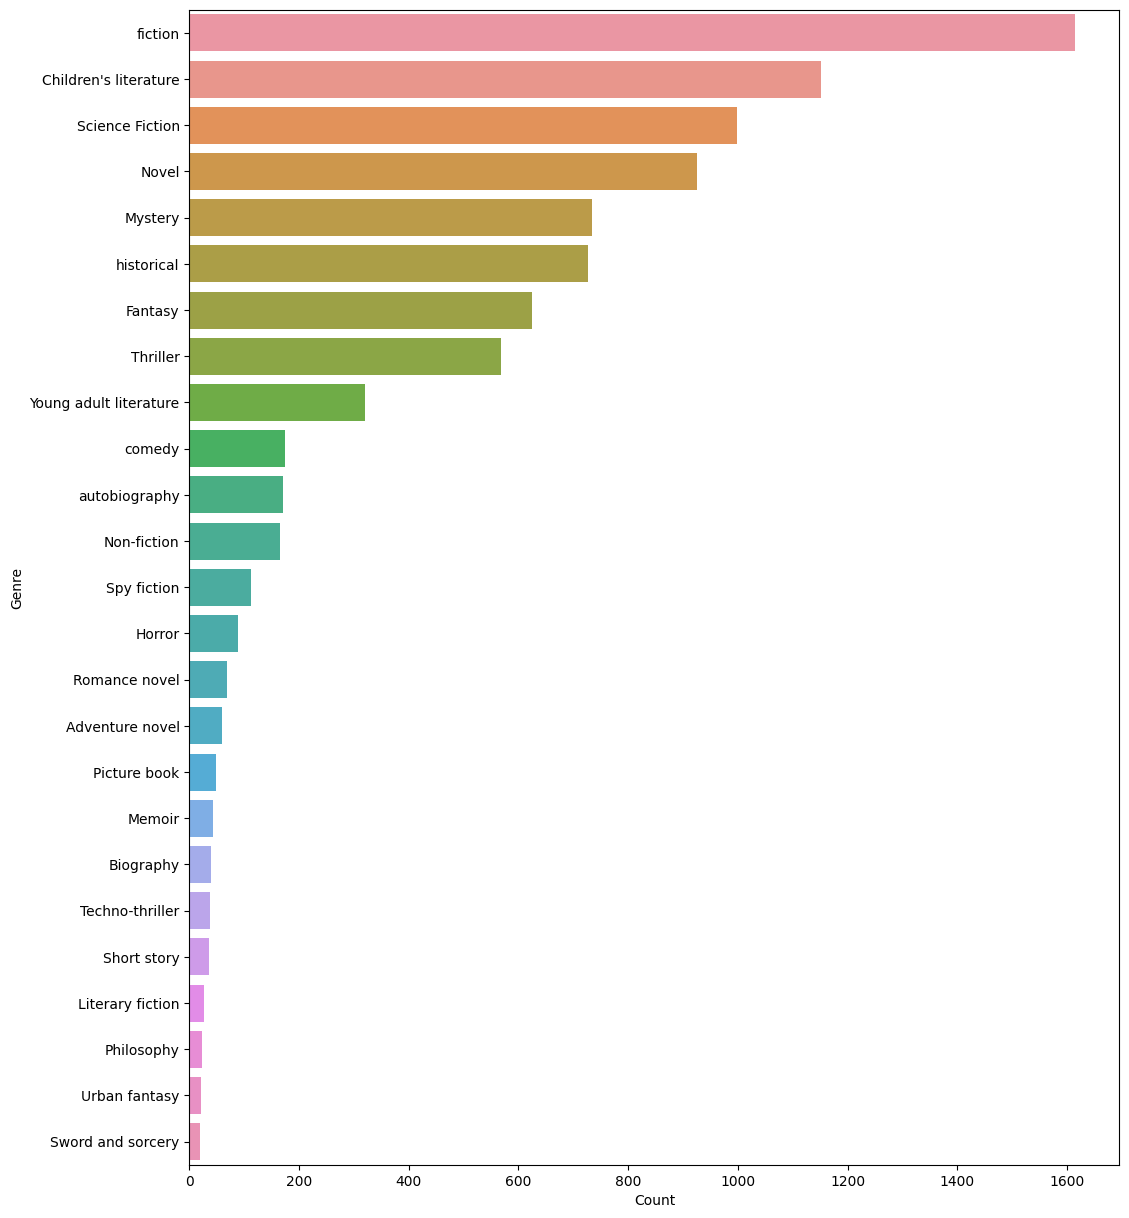

In [5]:
import nltk as nltk
import seaborn as sns
import matplotlib.pyplot as plt
all_genres=df.Genres.value_counts()
all_genres = nltk.FreqDist(df.Genres) 
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Genre') 
plt.show()

## Conclusions (As of now)

- Uneven distribution of data among different genres available in dataset
- Few genres have high volume of records
- Rest of the genres have very less data

## Performing Data Augmentation

In [23]:
import random
from random import shuffle
import nltk
## uncomment code below to download NLTK wordnet in your python
# nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
## uncomment code below to download NLTK wordnet in your python
# nltk.download("wordnet")
# nltk.download('omw-1.4')
from nltk.corpus import wordnet

In [24]:
def synonym_replacement(words, n):
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word not in stop_words]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(list(synonyms))
            new_words = [synonym if word == random_word else word for word in new_words]
            #print("replaced", random_word, "with", synonym)
            num_replaced += 1
        if num_replaced >= n: #only replace up to n words
            break

    #this is stupid but we need it, trust me
    sentence = ' '.join(new_words)
    new_words = sentence.split(' ')

    return new_words

In [25]:
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word): 
        for l in syn.lemmas(): 
            synonym = l.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
            synonyms.add(synonym) 
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

In [33]:
synonym_replacement(['hello','pretty','ugly','cloud','both','how'],3)

['hello', 'jolly', 'despicable', 'befog', 'both', 'how']